# Project 12: Explanatory Data Analysis Challenge (Olympic Games)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 12 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [87]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [88]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [89]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [90]:
dic[dic.isnull().any(axis=1)]

,Country,Code,Population,GDP per Capita
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
9,Aruba*,ARU,103889.0,NaN
20,Bermuda*,BER,65235.0,NaN
27,British Virgin Islands,IVB,30117.0,NaN
36,Cayman Islands*,CAY,59967.0,NaN
45,Cook Islands,COK,NaN,NaN
49,Cuba,CUB,11389562.0,NaN
61,Eritrea,ERI,NaN,NaN
74,Guam,GUM,169885.0,NaN


## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [91]:
two = pd.concat([summer,winter],axis=0,keys=['Winter','Summer'],names=["Edition"]).reset_index().drop(columns='level_1')
two.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Winter,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Winter,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Winter,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Winter,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Winter,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [92]:
olympics = pd.merge(two,dic.iloc[:,:2],how = 'left',left_on = 'Country', right_on = "Code").drop(columns='Code')
olympics.rename(columns={'Country_x':'Code','Country_y':'Country'},inplace=True)

## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).
2. __Remove Spaces__ from column headers in olympics and dictionary.
3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values! (Alternatively, you can find a Solution for this at the end of this Notebook!) 

In [93]:
dic.rename(columns={'GDP per Capita':'GDP'})

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [94]:
index = pd.Series(olympics.loc[olympics['Country'].isnull()].index)
index

0         132
1         133
2         134
3         135
4         136
        ...  
6362    33961
6363    33977
6364    33978
6365    33979
6366    33980
Length: 6367, dtype: int64

In [95]:
old_c = olympics.loc[olympics['Country'].isnull()]['Code'].value_counts().index
old_c

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [96]:
mapper = pd.Series(index=old_c, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [97]:
mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [98]:
olympics['Country'].fillna(olympics.loc[index,'Code'].map(mapper),inplace=True)

In [99]:
olympics.loc[olympics['Country'].isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Winter,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Winter,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Winter,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Winter,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)
2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [100]:
olympics.dropna(subset='Code',inplace = True)

In [101]:
olympics.loc[olympics['Code'].isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country


In [102]:
olympics.reset_index(drop=True,inplace=True)
olympics['Medal'].dtype

dtype('O')

In [103]:
olympics['Medal'] = olympics['Medal'].astype('category')

In [104]:
olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17988\1904861286.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True)


In [105]:
olympics.Medal.sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

## What are the most successful countries of all times?

For the next questions, use Seaborn plots.
1. What are the __Top 10__ Countries by __total medals__?
2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [106]:
top_10 = pd.DataFrame(olympics['Country'].value_counts().head(10)).reset_index()
top_10 = top_10.rename(columns={'index':'Country','Country':'Count'})


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Soviet Union'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'Hungary')])

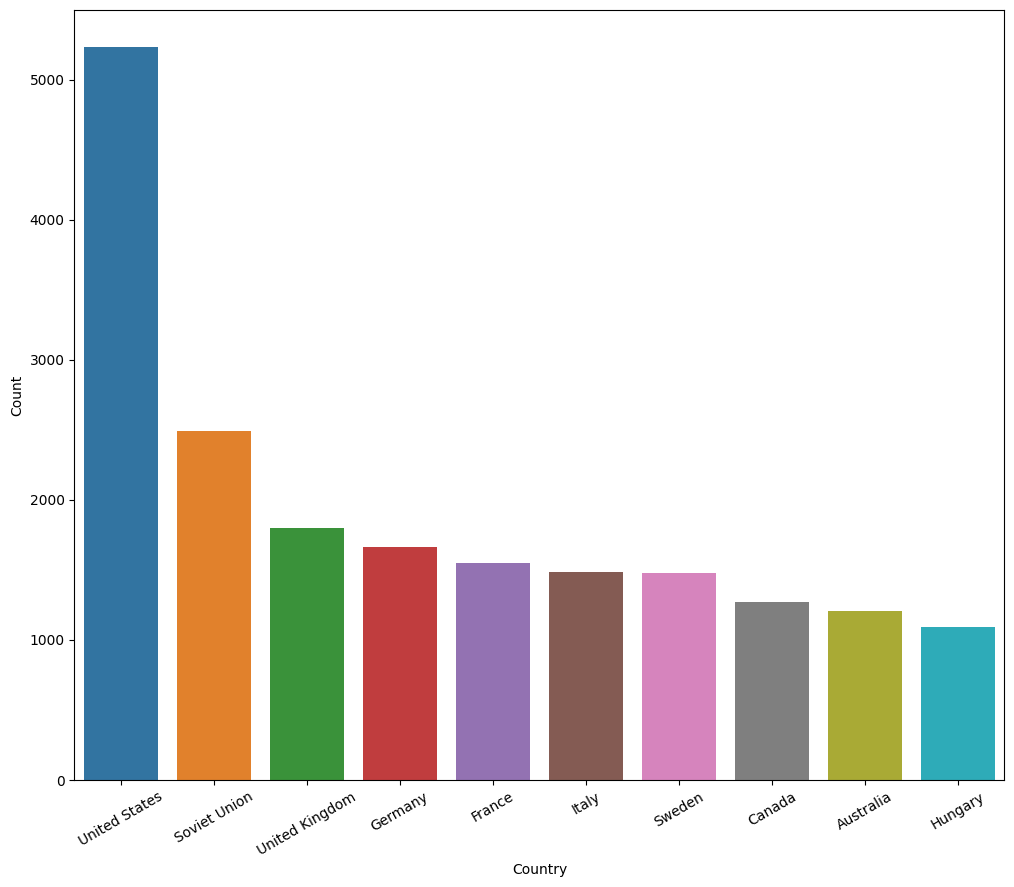

In [107]:
plt.figure(figsize=(12,10))
sns.barplot(data=top_10,x='Country',y='Count')
plt.xticks(rotation = 30)

In [108]:
top_10_index = olympics['Country'].value_counts().head(10).index
top_10_index

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary'],
      dtype='object')

In [109]:
toptop = olympics[olympics['Country'].isin(top_10_index)]
toptop.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Winter,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Winter,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Winter,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Winter,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Winter,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Soviet Union'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'Hungary')])

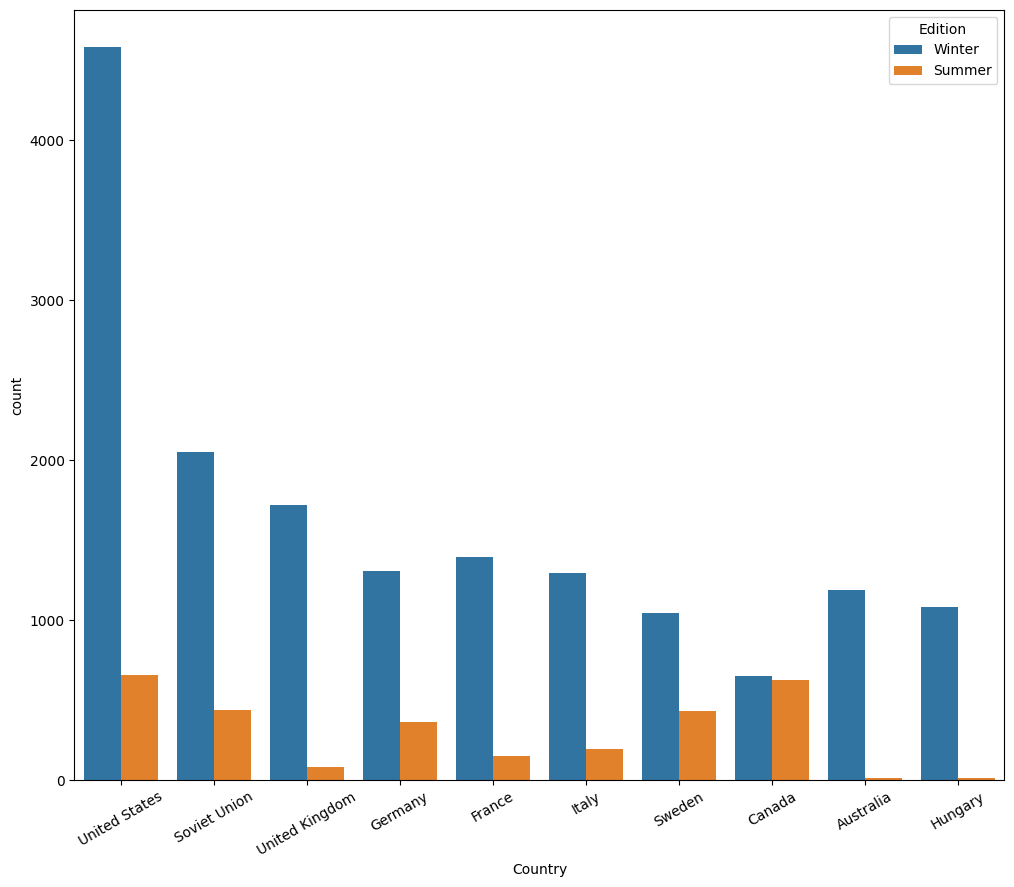

In [110]:
plt.figure(figsize=(12,10))
sns.countplot(data=toptop,x='Country',hue='Edition',order=top_10_index)
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Soviet Union'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'Hungary')])

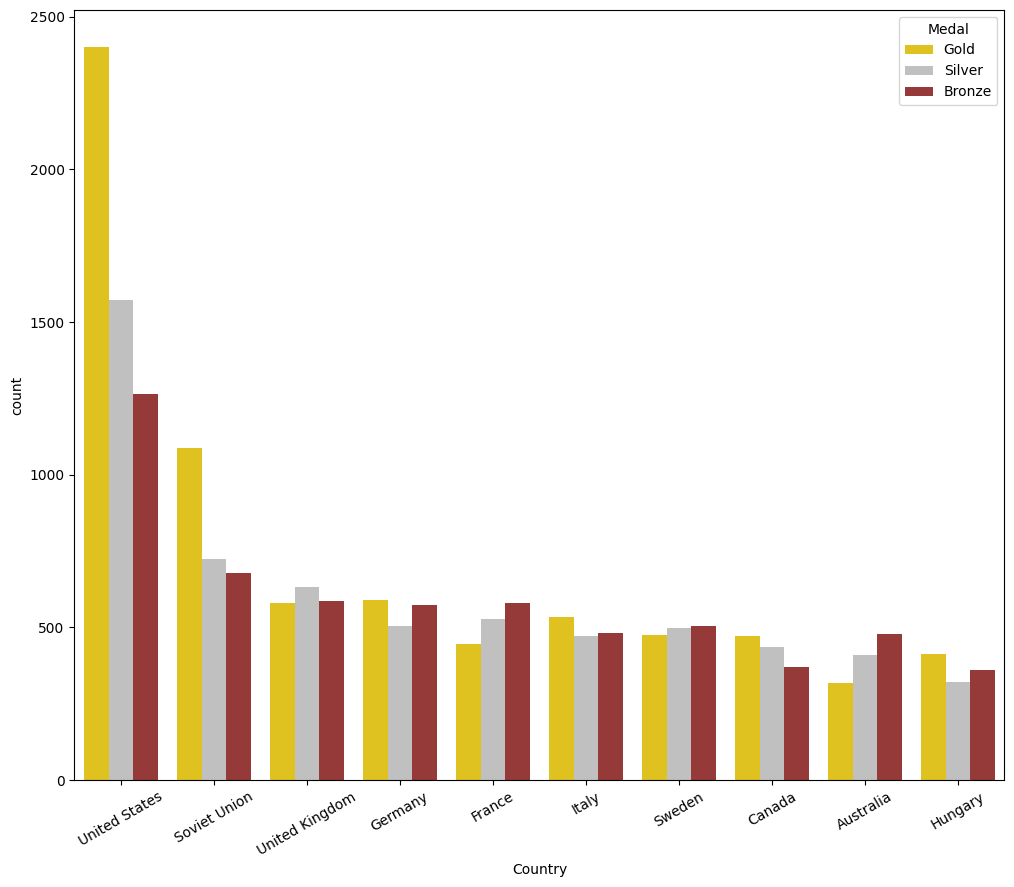

In [111]:
plt.figure(figsize=(12,10))
sns.countplot(data=toptop,x='Country',hue='Medal',order=top_10_index,hue_order=['Gold','Silver','Bronze'],palette = ["gold", "silver", "brown"])
plt.xticks(rotation = 30)

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

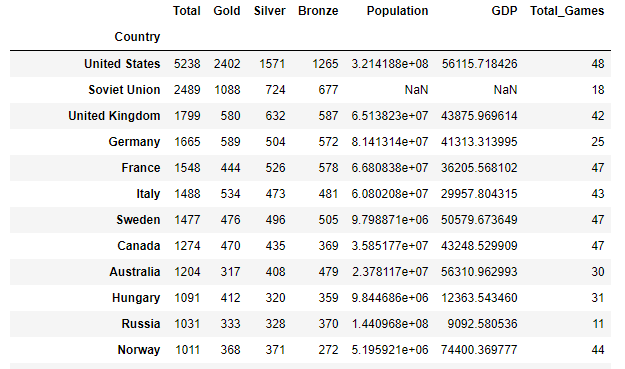

In [112]:
agg = pd.crosstab(index = olympics['Country'], columns = olympics['Medal'],margins=True,margins_name='Total')
agg.drop('Total',axis = 0,inplace = True)
agg.head()

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29


In [113]:
agg.sort_values(by = ['Total','Gold','Silver','Bronze'], ascending = False)

Medal,Bronze,Silver,Gold,Total
Country,,,,
United States,1265,1571,2402,5238
Soviet Union,677,724,1088,2489
United Kingdom,587,632,580,1799
Germany,572,504,589,1665
France,578,526,444,1548
...,...,...,...,...
Iraq,1,0,0,1
Macedonia,1,0,0,1
Mauritius,1,0,0,1


In [114]:
agg_2 = agg.merge(dic,how = 'left', left_index = True, right_on = 'Country').set_index('Country').copy()
agg_2.head(12)

,Bronze,Silver,Gold,Total,Code,Population,GDP per Capita
Country,,,,,,,
Afghanistan,2,0,0,2,AFG,32526562.0,594.323081
Algeria,8,2,5,15,ALG,39666519.0,4206.031232
Argentina,91,99,69,259,ARG,43416755.0,13431.878340
Armenia,8,2,1,11,ARM,3017712.0,3489.127690
Australasia,5,4,20,29,NaN,NaN,NaN
Australia,479,408,317,1204,AUS,23781169.0,56310.962993
Austria,147,179,100,426,AUT,8611088.0,43774.985174
Azerbaijan,15,5,6,26,AZE,9651349.0,5496.344640
Bahamas,5,9,13,27,BAH,388019.0,22817.230857


In [115]:
olympics['Games'] = olympics.apply(lambda x: str(x['Year']) + " " + x['City'], axis = 1)
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Winter,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Winter,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Winter,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Winter,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Winter,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens


In [116]:
agg_2['Total_games']= olympics.groupby('Country')['Games'].nunique() #.apply(lambda x: x['Games'].nunique())
agg_final = agg_2.sort_values(by = 'Total', ascending=False)

In [117]:
agg_final.head(12)

,Bronze,Silver,Gold,Total,Code,Population,GDP per Capita,Total_games
Country,,,,,,,,
United States,1265,1571,2402,5238,USA,321418820.0,56115.718426,48
Soviet Union,677,724,1088,2489,NaN,NaN,NaN,18
United Kingdom,587,632,580,1799,GBR,65138232.0,43875.969614,42
Germany,572,504,589,1665,GER,81413145.0,41313.313995,25
France,578,526,444,1548,FRA,66808385.0,36205.568102,47
Italy,481,473,534,1488,ITA,60802085.0,29957.804315,43
Sweden,505,496,476,1477,SWE,9798871.0,50579.673649,47
Canada,369,435,470,1274,CAN,35851774.0,43248.529909,47
Australia,479,408,317,1204,AUS,23781169.0,56310.962993,30


2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

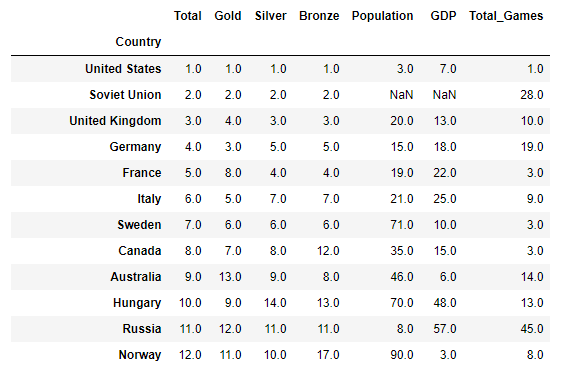

In [118]:
agg_final.rank(ascending=False , axis = 0)

,Bronze,Silver,Gold,Total,Code,Population,GDP per Capita,Total_games
Country,,,,,,,,
United States,1.0,1.0,1.0,1.0,6.0,3.0,7.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,NaN,28.0
United Kingdom,3.0,3.0,4.0,3.0,90.0,20.0,13.0,10.0
Germany,5.0,5.0,3.0,4.0,88.0,15.0,18.0,19.0
France,4.0,4.0,8.0,5.0,92.0,19.0,22.0,3.0
...,...,...,...,...,...,...,...,...
Iraq,114.5,135.0,122.5,133.5,75.0,34.0,76.0,131.0
Senegal,134.5,113.0,122.5,133.5,29.0,60.0,110.0,131.0
Macedonia,114.5,135.0,122.5,133.5,52.0,108.0,77.0,131.0


## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

In [119]:
import scipy.stats as stats

In [120]:
testing = agg_final.loc[:,['Total','Population','GDP per Capita', 'Total_games']].copy()

In [121]:
testing.corr(method='spearman')

,Total,Population,GDP per Capita,Total_games
Total,1.000000,0.419755,0.458478,0.927611
Population,0.419755,1.000000,-0.239097,0.402098
GDP per Capita,0.458478,-0.239097,1.000000,0.498056
Total_games,0.927611,0.402098,0.498056,1.000000


In [122]:
def hypo_test(x,y):
    r, p_val = stats.spearmanr(testing[x],testing[y],nan_policy='omit')
    print('The correlation is' , r)
    print('The p value is' , p_val)

Hypothesis 1: <br>
*  H0: There is no relationship between `Total Medal` and `Population` (independent) <br>
*  Ha: There is relationship between ... 

In [123]:
hypo_test('Total', 'Population')

The correlation is 0.41975527887063924
The p value is 8.132240868116897e-07


The relationship between `Total medal` and `Population` is not significant at 5% significance level.

## Aggregating and Ranking

Create the following __Seaborn Heatmap__ with __Medal Ranks__ for Top 50 Countries (Total Medals, Summer Games Medals, Winter Games Medals, Men, Women).

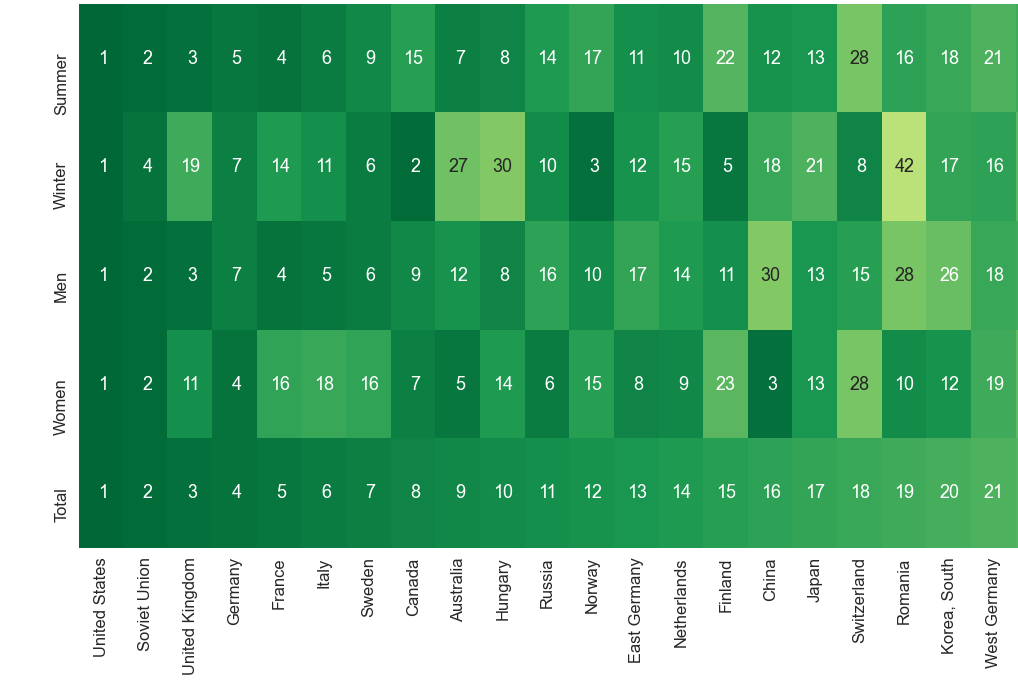

In [124]:
country_edition = pd.crosstab(index = olympics['Country'], columns= olympics['Edition'])

In [125]:
country_gender = pd.crosstab(olympics['Country'], olympics['Gender'])

In [126]:
country = pd.concat([country_edition,country_gender], axis = 1)
country.head()

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,0,2,2,0
Algeria,0,15,12,3
Argentina,0,259,187,72
Armenia,0,11,11,0
Australasia,0,29,27,2


In [127]:
country['Total'] = country['Summer'] + country['Winter']


In [141]:

ranks = country.rank(ascending=False,method='average')

In [151]:
ranks = ranks.sort_values('Total',ascending=True).head(20)
ranks

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,4.0,2.0,2.0,2.0,2.0
United Kingdom,19.0,3.0,3.0,11.0,3.0
Germany,7.0,5.0,7.0,4.0,4.0
France,14.0,4.0,4.0,16.5,5.0
Italy,11.0,6.0,5.0,18.0,6.0
Sweden,6.0,9.0,6.0,16.5,7.0
Canada,2.0,15.0,9.0,7.0,8.0
Australia,27.0,7.0,12.0,5.0,9.0


<Axes: xlabel='Country'>

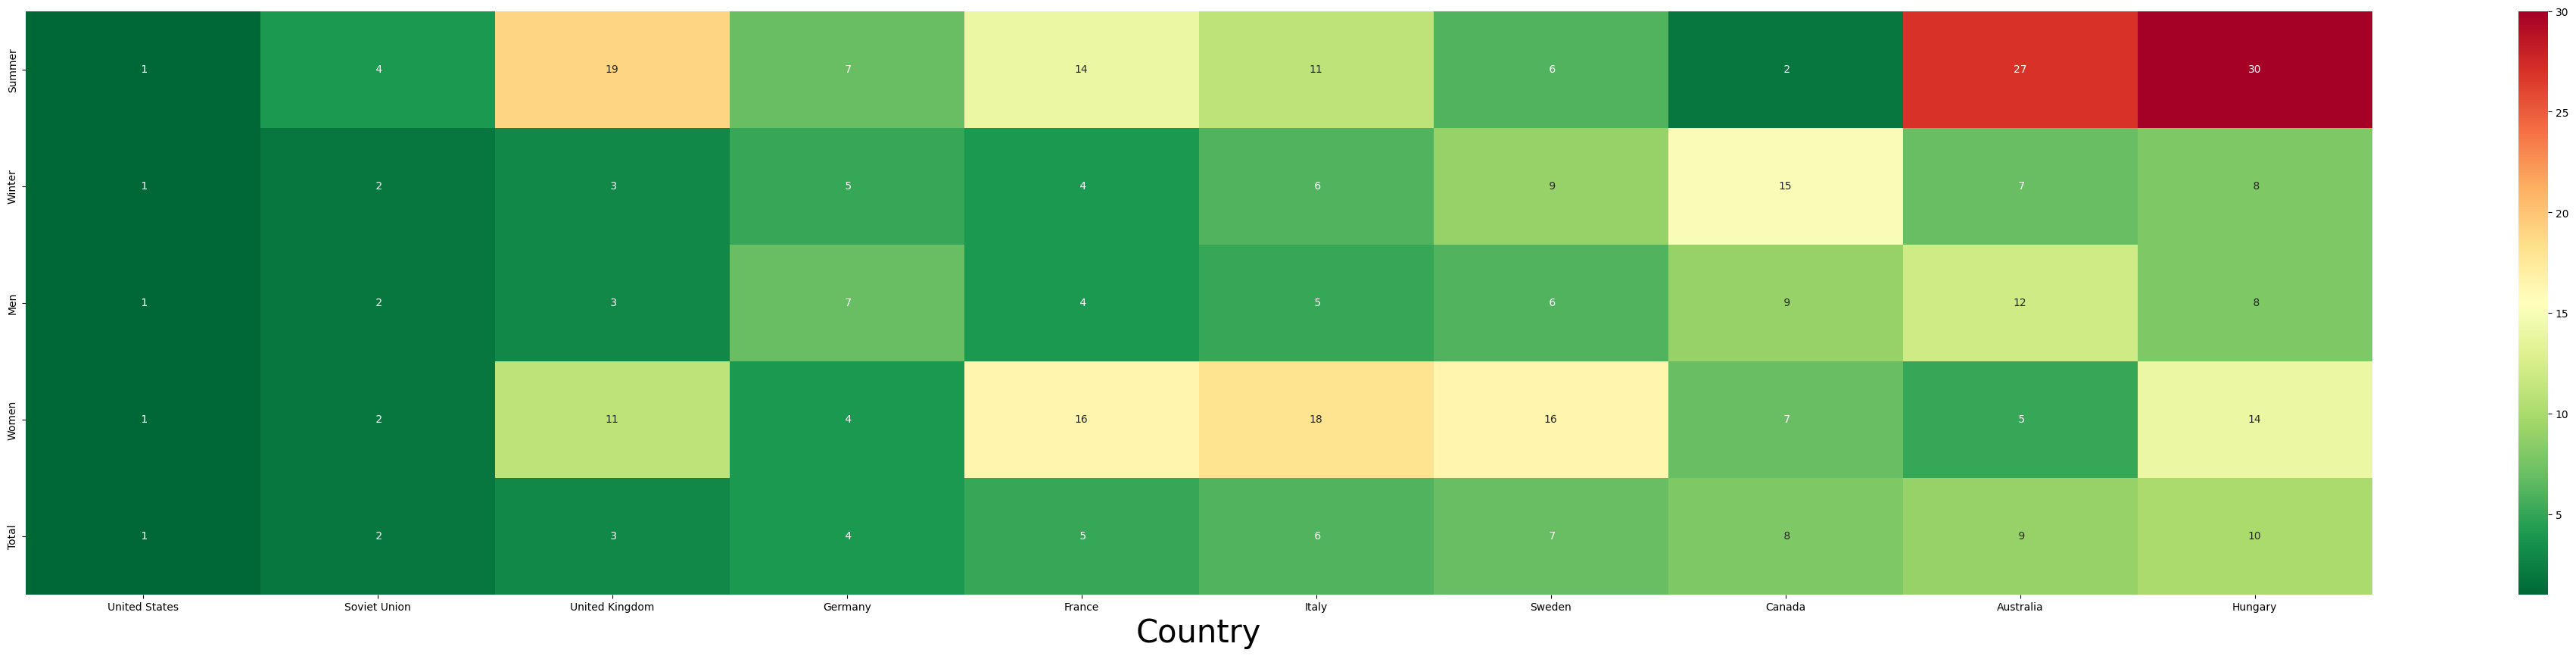

In [150]:
plt.figure(figsize = (50, 10))
sns.heatmap(ranks.head(10).T,cmap='RdYlGn_r',annot=True,fmt='2.0f')


## Summer Games vs. Winter Games - does Geographical Location matter?

__Identify Countries__ that are 
1. __equally successful__ in Summer and Winter Games
2. more successful in __Summer Games__
3. more successful in __Winter Games__


What could be the reasons?

In [152]:
ranks.sort_values('Summer')

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Canada,2.0,15.0,9.0,7.0,8.0
Norway,3.0,17.0,10.0,15.0,12.0
Soviet Union,4.0,2.0,2.0,2.0,2.0
Finland,5.0,22.0,11.0,23.0,15.0
Sweden,6.0,9.0,6.0,16.5,7.0
Germany,7.0,5.0,7.0,4.0,4.0
Switzerland,8.0,28.0,15.0,28.0,18.0
Russia,10.0,14.0,16.0,6.0,11.0


In [153]:
ranks.sort_values('Winter')

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,4.0,2.0,2.0,2.0,2.0
United Kingdom,19.0,3.0,3.0,11.0,3.0
France,14.0,4.0,4.0,16.5,5.0
Germany,7.0,5.0,7.0,4.0,4.0
Italy,11.0,6.0,5.0,18.0,6.0
Australia,27.0,7.0,12.0,5.0,9.0
Hungary,30.0,8.0,8.0,14.0,10.0
Sweden,6.0,9.0,6.0,16.5,7.0


<Axes: xlabel='Country'>

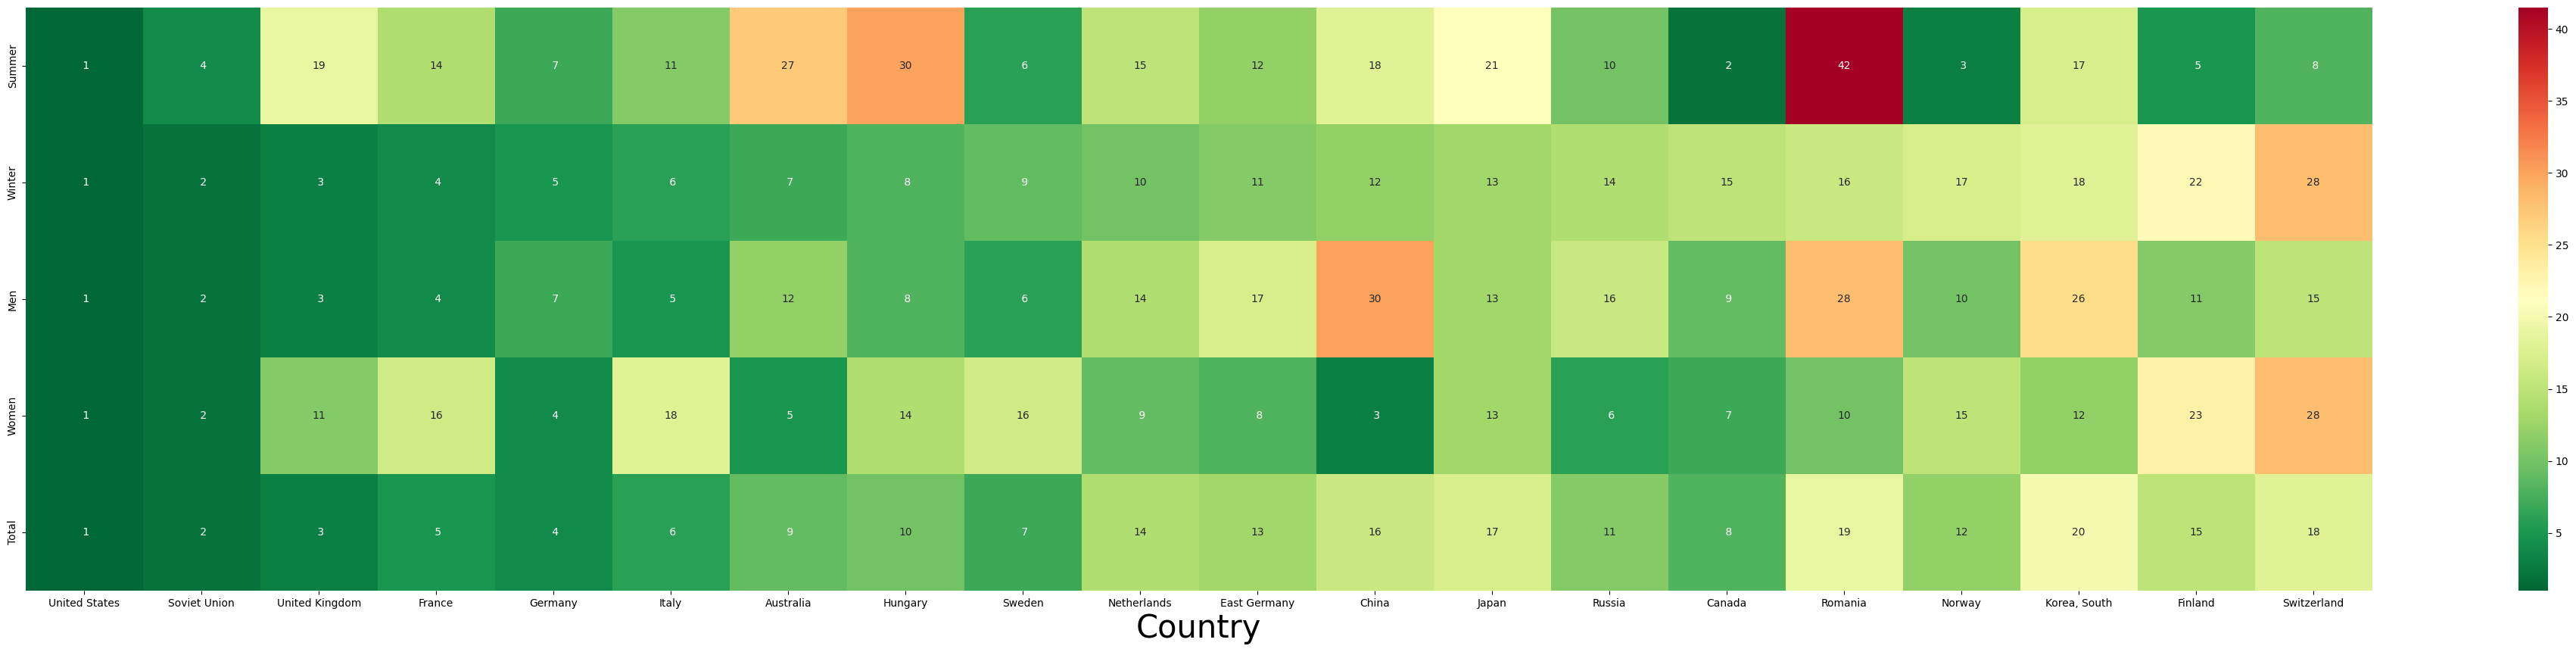

In [154]:
plt.figure(figsize = (50, 10))
sns.heatmap(ranks.sort_values('Winter').T,cmap='RdYlGn_r',annot=True,fmt='2.0f')

## Men vs. Women - does Culture & Religion matter?

__Identify Countries__ where
1. Men and Women are __equally successful__
2. __Men__ are more successful
3. __Women__ are more successful

What could be the reasons?

## Do Traditions matter?

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

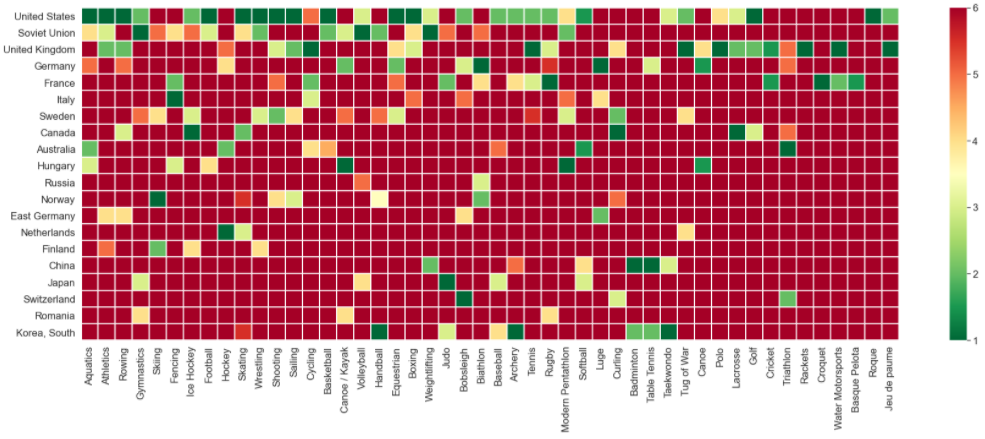

# Missing full Country Names (see Data Cleaning Part 1)

In [129]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}